# พลอตข้อมูลเรดาร์ NEXRAD level III เบื้องต้นที่ดึงมาแบบเรียลไทม์

### สิ่งที่จะได้เรียน
    * การพลอตแผนที่เรดาร์เบื้องต้น
    * การเพิ่มและตกแต่งข้อมูลแผนที่
    ** คำแนะนำก่อนเรียนแบบฝึกหัดนี้ นิสิตควรกลับไปศึกษาวีดีโอเพลย์ลิสสอนเรดาร์เบื้องต้นตามลิงก์นี้ https://www.youtube.com/watch?v=4s5pvvNPn1s&list=PL2e-NEAjUyLFXGMfse_JbL2T5TWh2YW-W และ สอนไพธอนเรดาร์ฺด้วย weradlib ลิงก์นี้ https://www.youtube.com/watch?v=7GLCJBoDFnQ&list=PL2e-NEAjUyLFlRjQ5fQBrX_8M-onbMQHf

### แหล่งอ้างอิง
* โค้ดได้มาจาก MetPy Monday ยูทูป https://www.youtube.com/watch?v=73fhfV2zOt8&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=22 และ https://www.youtube.com/watch?v=fSax8g9EfxM&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=23
* หากนิสิตเรียนจบในแบบเรียนนี้แล้ว แนะนำให้ศึกษาการพลอตเรดาร์แบบแอนิเมชั่น https://www.youtube.com/watch?v=4paJWaQkUF8&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=24
* ลิงก์นี้แสดงการดึงข้อมูลด้วย siphon และ พลอตเรดาร์ level III https://unidata.github.io/siphon/latest/examples/Radar_Server_Level_3.html



### แหล่งการเรียนรู้เรื่องเรดาร์และดาวเทียมทางด้านอุตุนิยมวิทยา
* ผศ.ดร.นัฐพล มหาวิค สาขาภูมิศาสตร์ ม.นเรศวร สอนเรื่องเรดาร์ตรวจอากาศใช้ IDV ลิงก์ https://www.youtube.com/watch?v=4s5pvvNPn1s&list=PL2e-NEAjUyLFXGMfse_JbL2T5TWh2YW-W 
* ผศ.ดร.นัฐพล มหาวิค สาขาภูมิศาสตร์ ม.นเรศวร สอนเรื่องเรดาร์ตรวจอากาศใช้ภาษาไพธอน wradlib ลิงก์ https://www.youtube.com/watch?v=7GLCJBoDFnQ&list=PL2e-NEAjUyLFlRjQ5fQBrX_8M-onbMQHf
* Dr.Kevin Perry จากมหาวิทยาลัยยูท่าห์ สอนเรื่องหลักการเรดาร์เบื้องต้น เป็นเลคเชอร์ที่มีประโยชน์มากในยูทูป https://www.youtube.com/watch?v=oCtOPVTt8kg&t=1858s
* Dr.Kevin Perry จากมหาวิทยาลัยยูท่าห์ สอนเรื่องดาวเทียมอุตุนิยมวิทยา ดีมาก  https://www.youtube.com/watch?v=WK0NyUdnsqQ
* หนังสือฟรี อุตุนิยมวิทยาภาคปฏิบัติ สอนการคำนวณของ Prof.Roland Stull https://www.eoas.ubc.ca/books/Practical_Meteorology/

### แนะนำให้เรียน
* วีดีโอสอนการดึงข้อมูล radar archive จาก NEXRAD AWS ซึ่งเป็นระบบคลาวด์สอนโดย MetPy Monday ลิงก์  https://www.youtube.com/watch?v=a2qAYVPRfrc&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=132

# 1. พลอตข้อมูลเรดาร์ NEXRAD level III เบื้องต้นที่ดึงมาแบบเรียลไทม์
โค้ดได้มาจาก MetPy Monday ยูทูป https://www.youtube.com/watch?v=73fhfV2zOt8&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=22

In [5]:
from siphon.catalog import TDSCatalog
from siphon.radarserver import RadarServer
from datetime import datetime, timedelta

### เก็บตัวแปรที่อยู่ที่จะใช้ดึงข้อมูล

In [6]:
# เก็บตัวแปรที่อยู่ที่จะใช้ดึงข้อมูล
cat = TDSCatalog('http://thredds.ucar.edu/thredds/radarServer/catalog.xml')

In [7]:
# get web address
rs = RadarServer(cat.catalog_refs['NEXRAD Level III Radar from IDD'].href)

In [8]:
# กำหนดช่วงเวลา สถานีเรดาร์ ข้อมูลที่ต้องการ ศึกษาโปรดักซ์เรดาร์ได้จาก https://www.ncei.noaa.gov/products/radar/next-generation-weather-radar
query = rs.query()
now = datetime.utcnow()

# เลือกสถานี เลือกตัวแปรที่ต้องการนำมาแสดง เช่น ค่าการสะท้อน ค่า cc ค่า hydrometeor
# เลือกภาพ 1 ชั่วโมงก่อนหน้าเวลาปัจจุบัน
query.stations('FTG').time_range(now-timedelta(hours=1), now).variables('N0Q')  #N0Q คือ ค่าการสะท้อนมุมยกแรกที่เรียกว่า base reflectivity อ่านรายละเอียดจากเวปไซต์ข้างต้น

var=N0Q&time_start=2022-04-18T02%3A35%3A03.264340&time_end=2022-04-18T03%3A35%3A03.264340&stn=FTG

In [9]:
# ดึงข้อมูลที่เรียกใช้ข้อมูลมาเก็บไว้ในตัวแปร
query_cat = rs.get_catalog(query)

### พลอตข้อมูลเรดาร์

In [11]:
import cartopy
import matplotlib.pyplot as plt
import numpy as np
from siphon.cdmr import Dataset

%matplotlib inline

In [12]:
# เก็บข้อมูลจากแคตาลอคในตัวแปร
data = query_cat.datasets[0].remote_access() # เลือกข้อมูลแรกใช้ 0 นิสิตลองเปลี่ยนเป็น 1,2 
print(list(data.variables)) 

['elevation', 'azimuth', 'gate', 'latitude', 'longitude', 'altitude', 'rays_time', 'BaseReflectivityDR_RAW', 'BaseReflectivityDR']


## พลอตข้อมูลเรดาร์

### จัดเก็บข้อมูลตัวแปรที่จะนำมาใช้พลอต

In [17]:
# ทำการพลอตข้อมูลตัวแปร 'BaseReflectivityDR'
field_name = 'BaseReflectivityDR'

range_data = data.variables['gate'][:] # range
azimuth_data = data.variables['azimuth'][:] #มุมอซิมุท
radar_data = data.variables[field_name][:] #ค่าตัวแปร


In [20]:
range_data.shape

(460,)

In [21]:
azimuth_data.shape

(360,)

In [19]:
# แปลงข้อมูลระยะทางเชิงมุม ให้เป็นข้อมูลระบบพิกัด ใช้ตรีโกณ
x = range_data * np.sin(np.deg2rad(azimuth_data))[:, None] #ใช้เรเดียนแทนองศา
y = range_data * np.cos(np.deg2rad(azimuth_data))[:, None]

In [22]:
# ทำการ mask ในส่วนที่ไม่ข้อมูล ก่อนนำไปใช้กับค่า x,y
radar_data = np.ma.array(radar_data, mask=np.isnan(radar_data))


In [23]:
# เซตค่าแผนที่ของระบบพิกัดและเส้นโครงแผนที่ของเรดาร์ให้ถูกต้อง ด้วยการดึงข้อมูล lat/lon มาจาก metadata

proj = cartopy.crs.LambertConformal(central_longitude=data.RadarLongitude,
                                   central_latitude=data.RadarLatitude)

In [24]:
# เส้นโครงแผนที่แบบ LambertConformal
proj

C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\Admin\anaconda3\envs\metpy\li

<Projected CRS: +proj=lcc +ellps=WGS84 +lon_0=-104.546 +lat_0=39.7 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Conic Conformal (2SP)
Datum: Unknown based on WGS84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### พลอตแผนที่เรดาร์เบื้องต้น

C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\mpl\geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


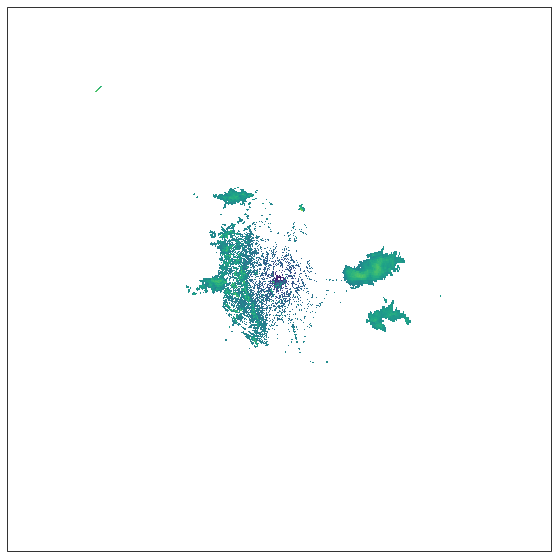

In [25]:
# พลอตแผนที่เรดาร์เบื้องต้น
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(1, 1, 1, projection=proj)

mesh = ax.pcolormesh(x, y, radar_data, zorder=0)

ได้แผนที่ค่าการสะท้อนในเบื้องต้น แต่ก็ยังไม่มีค่าพิกัดกำกับ และค่า color bar อธิบาย

# 2.ทำการขยายในส่วนที่สนใจ พร้อมข้อมูลค่าพิกัด
* โค้ดได้มาจาก metpy monday https://www.youtube.com/watch?v=fSax8g9EfxM&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=23

C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\mpl\geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


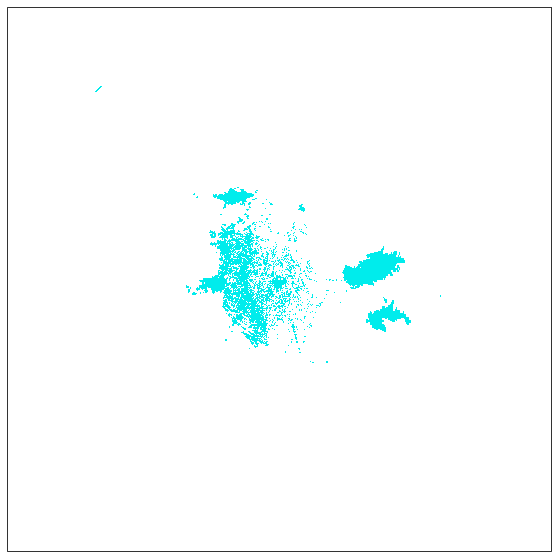

In [28]:
from metpy.plots import ctables 
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(1, 1, 1, projection=proj)

norm, cmap = ctables.registry.get_with_steps('NWSReflectivity', 16, 16) # color map ดูได้จาก https://www.weather.gov/jetstream/refl
mesh = ax.pcolormesh(x, y, radar_data, norm=norm, cmap=cmap, zorder=0)

* ภาพด้านบน มีแต่สีฟ้า แสดงว่าเป็นลักษณะ clear air ไม่มีฝน ดู color map ของ nws ได้จากลิงก์ https://www.weather.gov/jetstream/refl
* ควรต้องมีการใส่ค่าข้อมูลแผนที่ และเวลาเข้าไป เพื่อให้แผนที่นี้มีรายละเอียด

### เพิ่มรายละเอียดแผนที่เรดาร์

In [30]:
# วันเวลาที่ทำการตรวจวัดเรดาร์
print(data.time_coverage_start)

2022-04-18T02:52:31Z


In [32]:
#เก็บค่าวันเวลาในรูปแบบของไพธอน date time object
data_time = datetime.strptime(data.time_coverage_start, '%Y-%m-%dT%H:%M:%SZ')
print(data_time)


2022-04-18 02:52:31


Text(0.99, -0.04, 'Created: 2022-04-18T02:52:31Z')

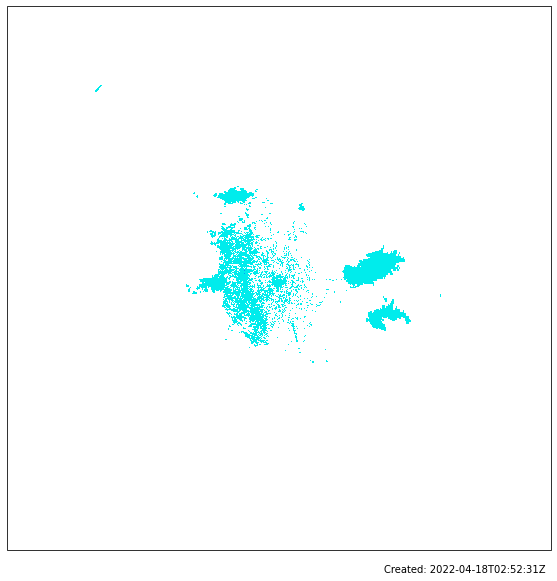

In [35]:
# เพิ่มข้อมูล เวลาในการเริ่มสแกน
from metpy.plots import ctables, add_timestamp  # เพิ่ม  add_timestamp 
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(1, 1, 1, projection=proj)

norm, cmap = ctables.registry.get_with_steps('NWSReflectivity', 16, 16) # color map ดูได้จาก https://www.weather.gov/jetstream/refl
mesh = ax.pcolormesh(x, y, radar_data, norm=norm, cmap=cmap, zorder=0)
add_timestamp(ax, data_time) # run ดู

สังเกตุด้านมุมขวาล่าง จะมีตัวหนังสือแสดงเวลาที่เริ่มสแกนเรดาร์ 
ต่อไปจะเพิ่มแผนที่ขอบเขตการปกครอง state

C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\mpl\geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


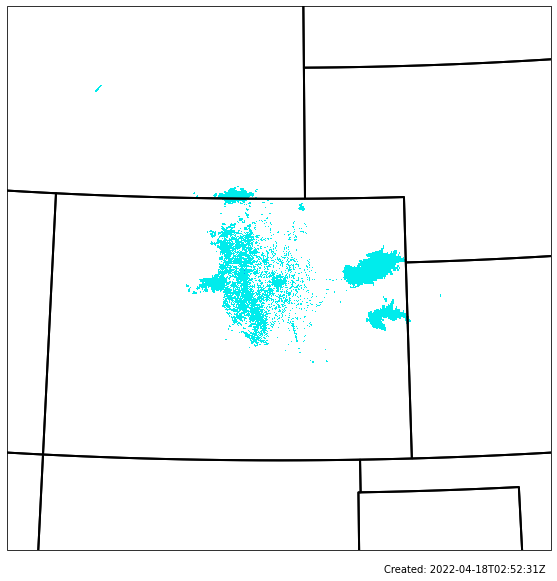

In [36]:
# เพิ่มข้อมูล เวลาในการเริ่มสแกน
from metpy.plots import ctables, add_timestamp  # เพิ่ม  add_timestamp 

#เพิ่มแผนที่ตรงนี่้
state_borders = cartopy.feature.NaturalEarthFeature(
    category='cultural', name='admin_1_states_provinces_lakes',
    scale='50m', facecolor='none')

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(1, 1, 1, projection=proj)

norm, cmap = ctables.registry.get_with_steps('NWSReflectivity', 16, 16) # color map ดูได้จาก https://www.weather.gov/jetstream/refl
mesh = ax.pcolormesh(x, y, radar_data, norm=norm, cmap=cmap, zorder=0)
add_timestamp(ax, data_time) # run ดู

ax.add_feature(state_borders, edgecolor='black', linewidth=2, zorder=2)

ได้ข้อมูลแผนที่การปกครองแล้ว ต่อไปจะเซตค่าแผนที่ให้พอดีกับค่าขอบเขตการสแกนเรดาร์

C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\mpl\geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for lin

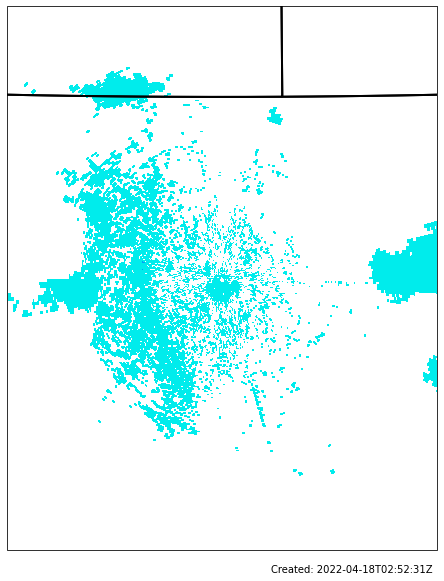

In [37]:
# เพิ่มข้อมูล เวลาในการเริ่มสแกน
from metpy.plots import ctables, add_timestamp  # เพิ่ม  add_timestamp 

#เพิ่มแผนที่ตรงนี่้
state_borders = cartopy.feature.NaturalEarthFeature(
    category='cultural', name='admin_1_states_provinces_lakes',
    scale='50m', facecolor='none')

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(1, 1, 1, projection=proj)

norm, cmap = ctables.registry.get_with_steps('NWSReflectivity', 16, 16) # color map ดูได้จาก https://www.weather.gov/jetstream/refl
mesh = ax.pcolormesh(x, y, radar_data, norm=norm, cmap=cmap, zorder=0)
add_timestamp(ax, data_time) # run ดู

ax.add_feature(state_borders, edgecolor='black', linewidth=2, zorder=2)

#!!!! เซตค่า extent ตรงนี้
distance_in_degrees = 1.8
ax.set_extent([data.RadarLongitude - distance_in_degrees,
                    data.RadarLongitude + distance_in_degrees,
                    data.RadarLatitude - distance_in_degrees,
                   data.RadarLatitude + distance_in_degrees])

# งานมอบหมาย
* นิสิตลองเปลี่ยนข้อมูลเป็น 1 หรือ 2 หรือ -1 ในโค้ดบรรทัด data = query_cat.datasets[0].remote_access() # เลือกข้อมูลแรกใช้ 0 นิสิตลองเปลี่ยนเป็น 1,2 
* นิสิตลองเปลี่ยน สถานีเรดาร์เป็น 'INX' หรือ 'TLX' แล้วลองพลอตข้อมูล

### ศึกษาต่อ
* หากนิสิตเรียนจบในแบบเรียนนี้แล้ว แนะนำให้ศึกษาการพลอตเรดาร์แบบแอนิเมชั่น https://www.youtube.com/watch?v=4paJWaQkUF8&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=24